<H1>1. Introduction</H1>
RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. 

<H3>1.1 About the Data Set</H3>
Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The data was extracted from Kaggle website https://www.kaggle.com/c/titanic/data

<H1>2. Data Analysis</H2>
<H3>2.1 Questions</H3>
In my analysis I will look for answers to the following questions: 
<ul>
<li>What relevance does Gender have in increasing chance of surviving?</li>
<li>What relevance does Age have in increasing chance of surviving?</li>
<li>What relevance does Fare Price have in increasing chance of surviving?</li>
<li>What relevance does Passenger class have in increasing chance of surviving?</li>
</ul>

<h3>2.2 Investigate and Prepare Data</h3>

<h4>2.2.1 Import Data Set and Check contents in a Data Frame</h4>

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [122]:
titanic_df = pd.read_csv('titanic_data.csv')

In [123]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<H4>2.2.2 Remove unwanted columns</H4>
<p>I have removed the following columns as they will not be used in this anlaysis:</p>
<li>Cabin</li>
<li>Ticket</li>
<li>Embarked</li>
<li>Name</li>
<li>PassengerId</li>


In [124]:
titanic_df = titanic_df[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]

In [125]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
5,6,0,3,male,NaN,0,0,8.4583
6,7,0,1,male,54.0,0,0,51.8625
7,8,0,3,male,2.0,3,1,21.0750
8,9,1,3,female,27.0,0,2,11.1333
9,10,1,2,female,14.0,1,0,30.0708


<h4>2.2.3 Identify Missing Values</h4>

In [126]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<H4>2.2.4 Resolve missing values</h4>
<p>After running the describe() function it is evident that Age is missing values ie all other columns have 891
records but age has 714. </p>
<p>To resolve I will substitute all NA values with the median; which is safer to use than the mean as the mean can be skewed by large and small value outliers. 
</p>

In [127]:
# Run the following to replace missing Age values with the Median of Age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [128]:
# Run to validate change fillna function has worked
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<H4>2.2.5 Identify Data Types</H4>
<lu>
<li>List the data type of each column, may be a helpful reference for problem solving later</li>
</lu>

In [129]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

<h1>2.3 Answering Questions</h2>

<h3>2.3.1 Do women have a greater chance of surviving than men?</H3>

In [146]:
survived_sex = titanic_df[titanic_df['Survived']==1]['Sex'].value_counts()
dead_sex = titanic_df[titanic_df['Survived']==0]['Sex'].value_counts()

In [147]:
# Record the results in a DataFrame
gender_df = pd.DataFrame([survived_sex,dead_sex],index = ['Survived','Dead'])

In [148]:
# Present measure output
gender_df.head()

,female,male
Survived,233,109
Dead,81,468


<H4>Create Bar Chart of Survival Totals Based on Gender</h4>

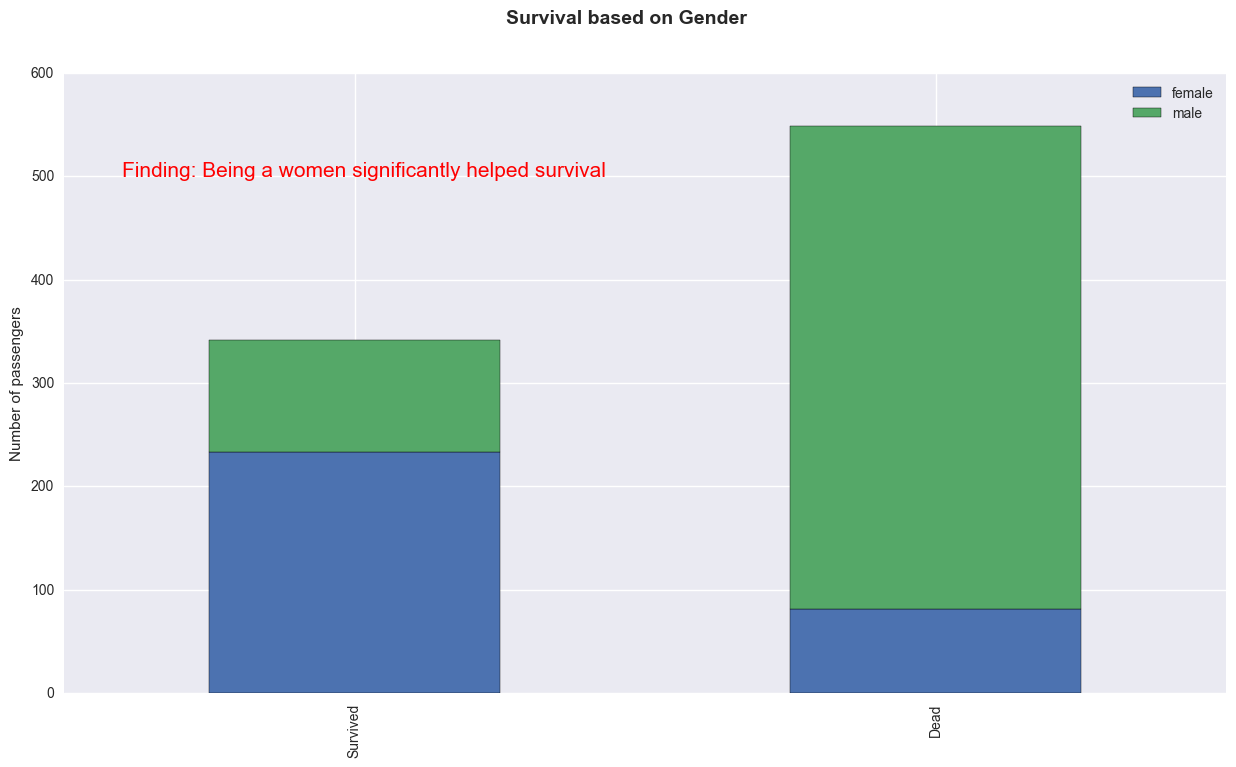

In [160]:

gender_df.plot(kind='bar',stacked=True, figsize=(15,8))
plt.ylabel('Number of passengers')
plt.suptitle('Survival based on Gender', fontsize=14, fontweight='bold')
plt.text(-.4, 500,'Finding: Being a women significantly helped survival', fontsize=15, color='red')

<H4>Create Bar Chart of Survival Mean Based on Gender</h4>

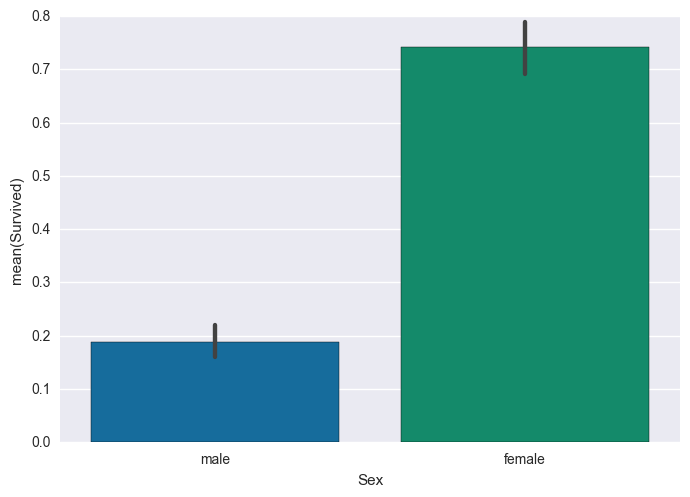

In [166]:
sns.set(style="darkgrid")
sns.barplot(data=titanic_df, x='Sex',y='Survived',palette="colorblind")
sns.plt.show()

<b>Summary of plots: </b>
It is evident from looking at the bar charts that being a women significantly increased your chances of survival on the titanic. 

<h3>2.3.2 What relevance does Age have in increasing chance of surviving?</h3>

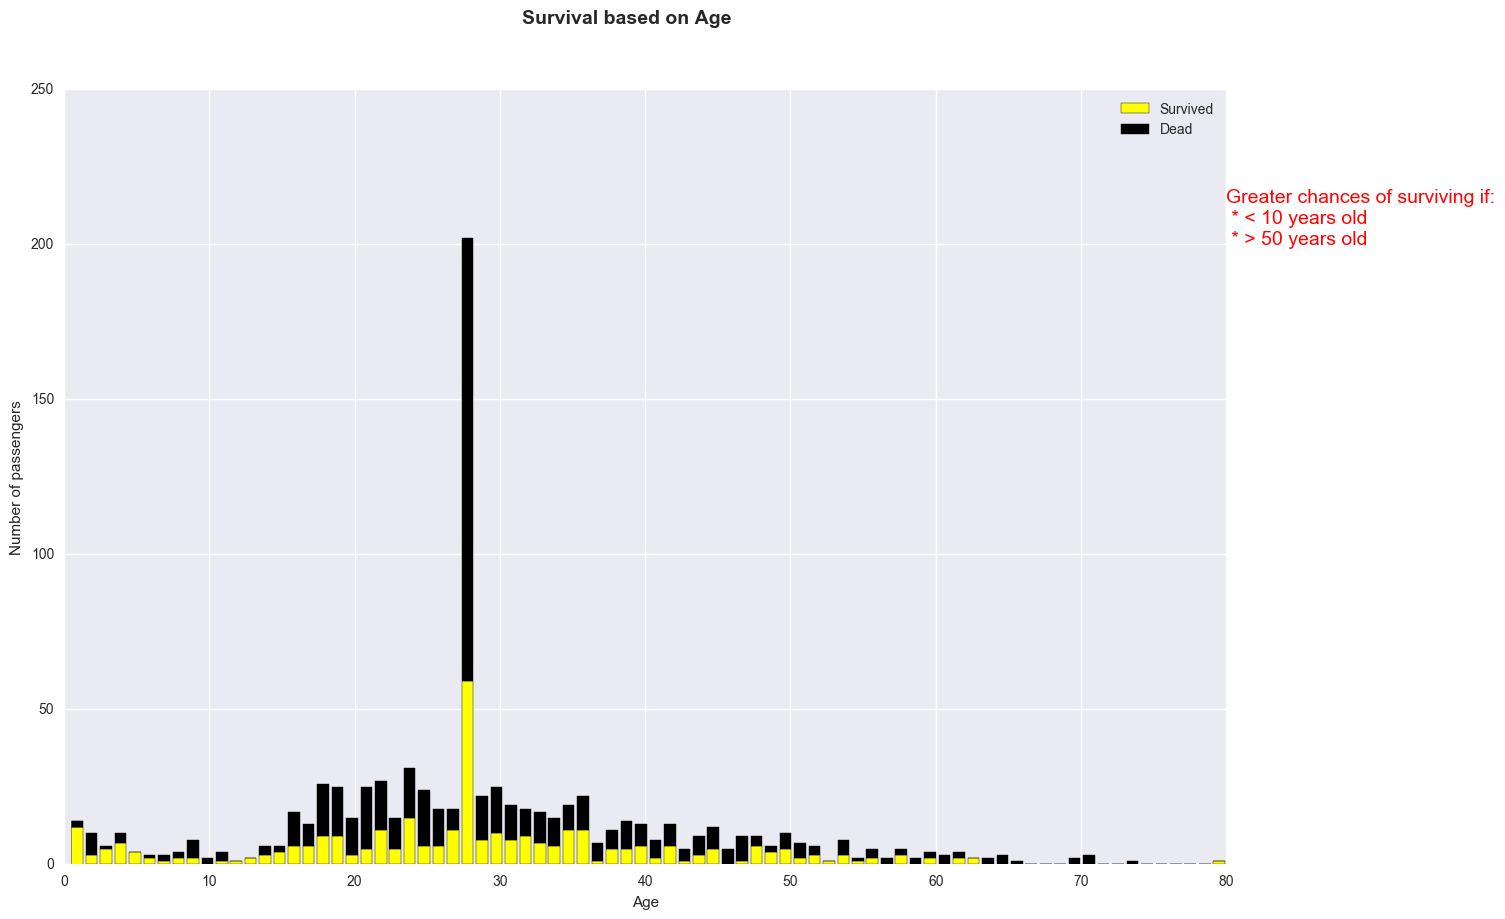

In [165]:
figure = plt.figure(figsize=(15,10))
plt.hist([titanic_df[titanic_df['Survived']==1]['Age'],
          titanic_df[titanic_df['Survived']==0]['Age']], 
         stacked=True, 
         color = ['yellow','black'],
         bins = 80,
         label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.suptitle('Survival based on Age', fontsize=14, fontweight='bold')
plt.text(80, 200,'Greater chances of surviving if:\n * < 10 years old \n * > 50 years old', fontsize=14, color='red')

<b>Summary of Findings:</b>
By looking at the ratio of yellow to black in the stacked bars it appears that if you were aged approx <15 years you stood a greater chance of surviving. 
<b>Interesting Findings</b>
<ul>
<li>the ages 9-10 do not appear to fit within the above statement.</li>
<li>the ages 35-36 had a greater ratio of survival</li>
</ul>

<h3>2.3.3 What relevance does Fare Price have in increasing chance of surviving?</h3>

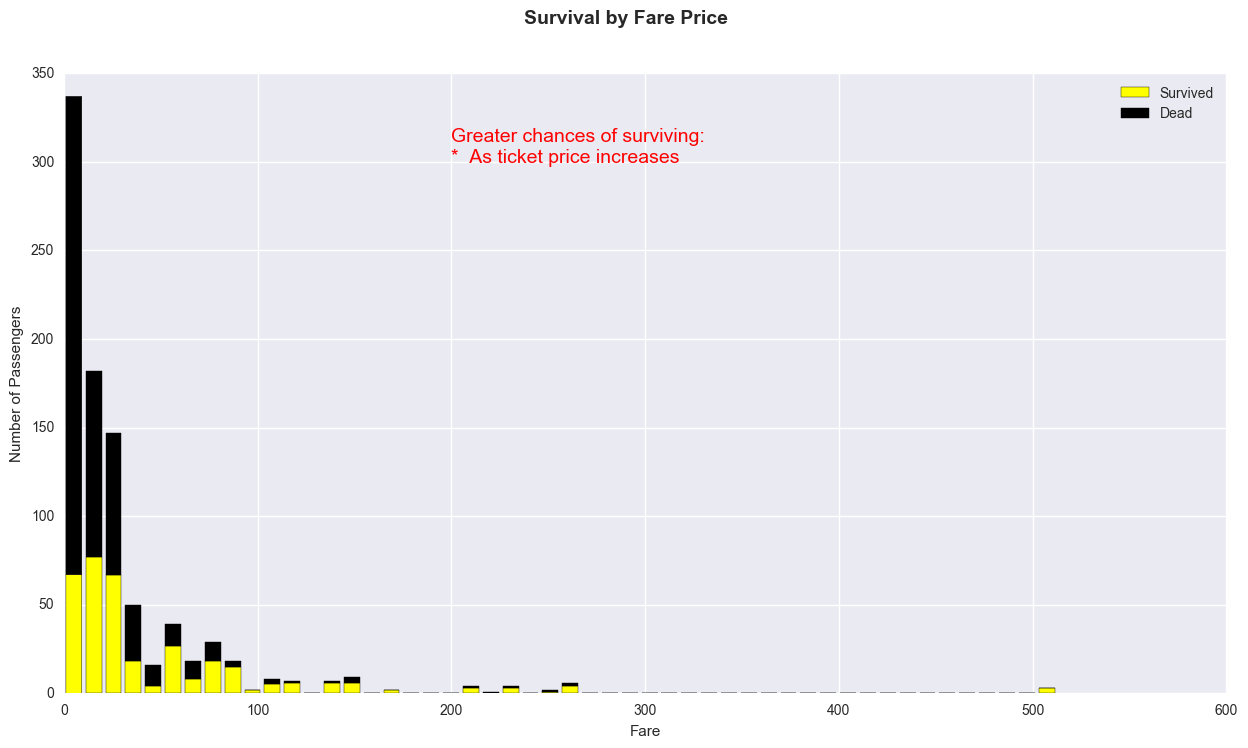

In [174]:
figure = plt.figure(figsize=(15,8))  #15 grids
plt.hist([titanic_df[titanic_df['Survived']==1]['Fare'],
          titanic_df[titanic_df['Survived']==0]['Fare']], 
         stacked=True, 
         color = ['yellow','black'],
         bins = 50,
         label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()
plt.suptitle('Survival by Fare Price', fontsize=14, fontweight='bold')
plt.text(200, 300,'Greater chances of surviving: \n*  As ticket price increases', fontsize=14, color='red')

<b>Summary of Findings:</b>
By looking at the ratio of yellow to black in the stacked bars it appears that as the passengers ticket price increased so did they chances of survival

<b>Interesting Finding: </b>
The ticket price between 40-50 is an exception to the above statement

<h4>Combine Age & Ticket price data to create a Scatter Plot</h4>
Because a child ticket price is often much cheaper than an adults I've made use of a scatter plot to see the relationship of the two variables in context of survival

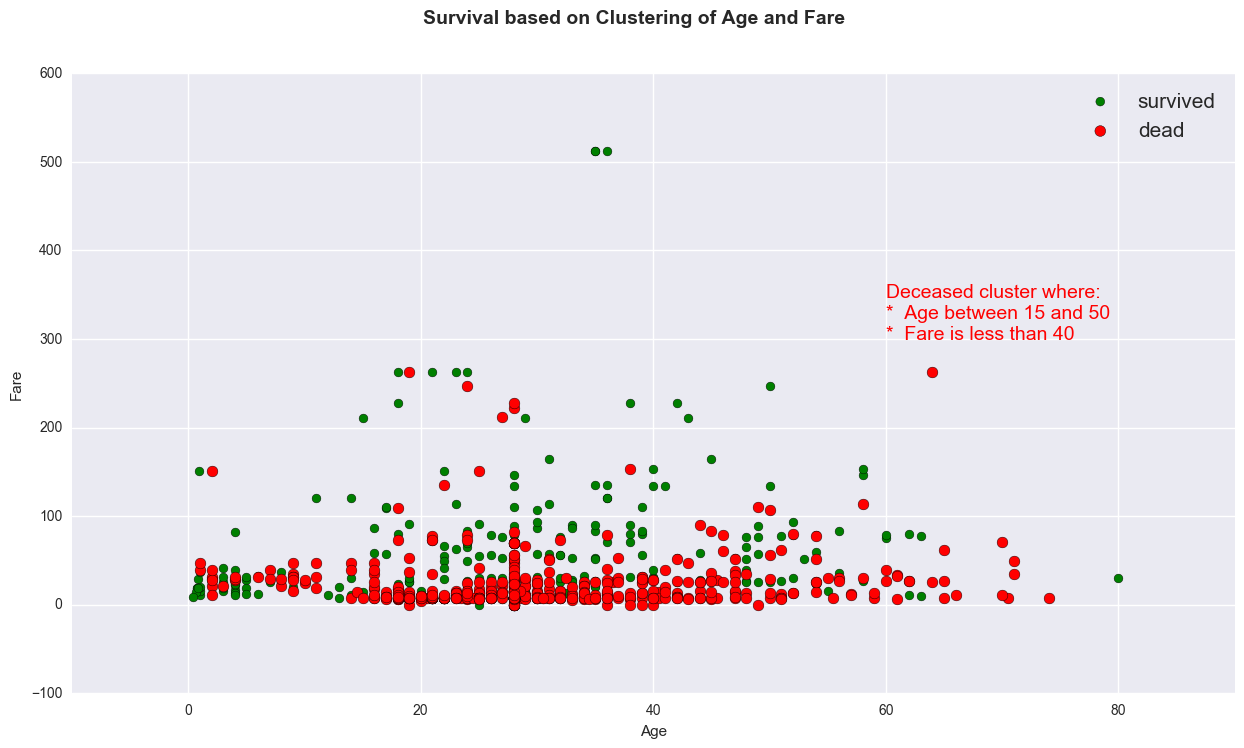

In [182]:
plt.figure(figsize=(15,8))
ax = plt.subplot()

# Plot Survived
ax.scatter(titanic_df[titanic_df['Survived']==1]['Age'],
           titanic_df[titanic_df['Survived']==1]['Fare'],
           c='green',
           s=40)

# Plot Deceased
ax.scatter(titanic_df[titanic_df['Survived']==0]['Age'],
           titanic_df[titanic_df['Survived']==0]['Fare'],
           c='red',
           s=60)

ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),
          scatterpoints=1,
          loc='upper right',
          fontsize=15,)

plt.suptitle('Survival based on Clustering of Age and Fare', fontsize=14, fontweight='bold')
plt.text(60, 300,'Deceased cluster where: \n*  Age between 15 and 50 \n*  Fare is less than 40', fontsize=14, color='red')

<b>Summary of Findings:</b>
Fare price only appears to be relevant for those aged >=15

<H3>2.3.4 What relevance does Passenger class have in increasing chance of surviving?</h3>

<b>Is there a correlation with Fare Price and Passenger Class?</b>

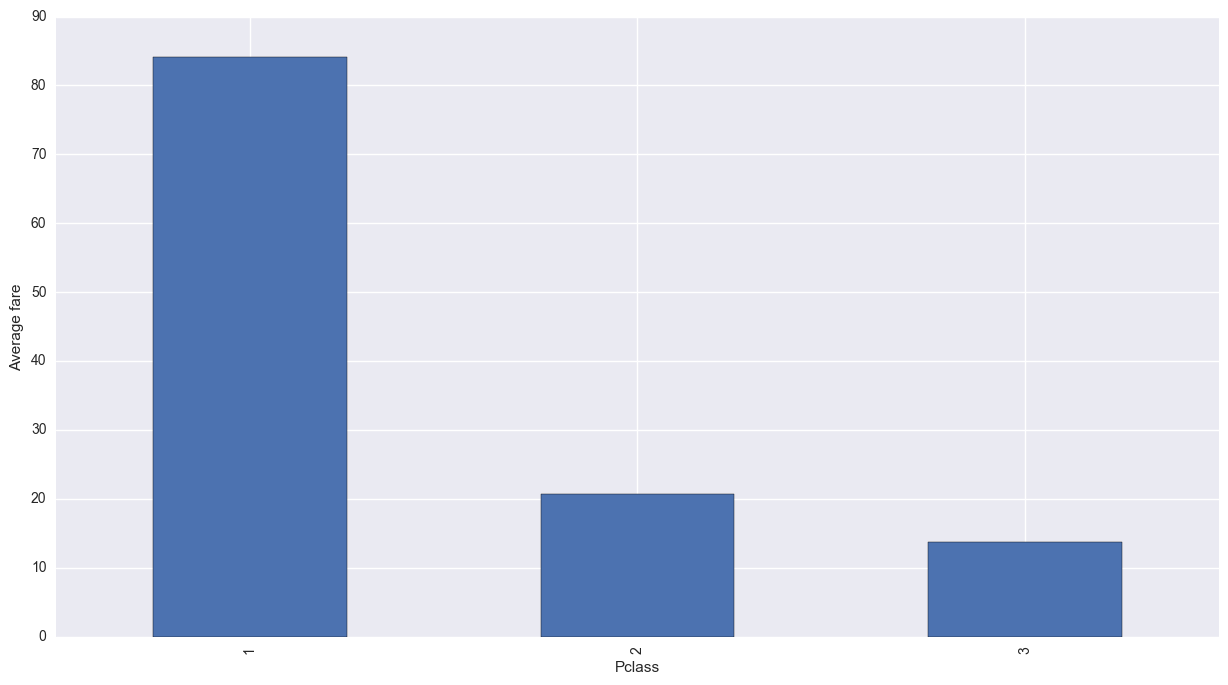

In [216]:
ax = plt.subplot(111)
ax.set_ylabel('Average fare')
titanic_data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax = ax)

<b>Summary of Findings: </b>
Higher fare prices correlate with Passenger Class

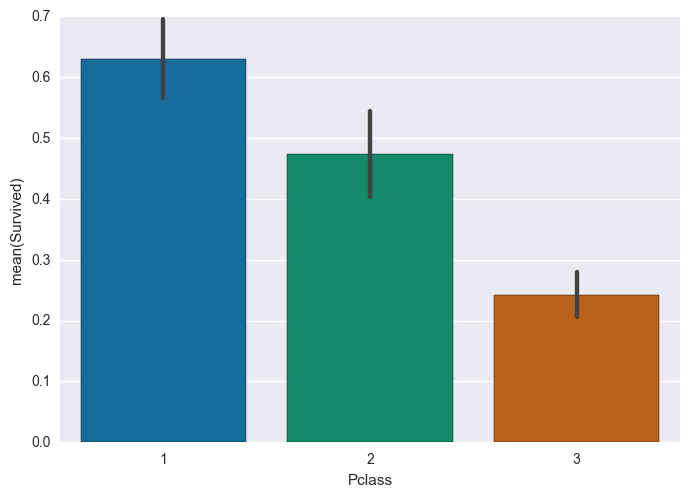

In [184]:
sns.barplot(data=titanic_df, x="Pclass", y='Survived', palette="colorblind")
sns.plt.show()

<b>Summary of Findings: </b>
Higher fare prices correlate with Passenger Class

<h2>3.0 Tentative Conclusion</h2>
All of the following appear to have a significant relevant in determining the chance of survival
Gender: Female
Age: <15
Fare Price: > 50
Passenger Class: 1

To validate further statistical analysis will be required to validate the accuracy of this finding made through visual analysis. 

<h2>4.0 References</h2>
<ul>
<li>http://seaborn.pydata.org/</li>
<li>http://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type</li>
<li>http://pandas.pydata.org/pandas-docs/version/0.15.2/tutorials.html</li>
<li>http://matplotlib.org/</li>
<li>Video lectures of the course (Intro to Data Analysis)</li>
<li>Kaggle titanic competition page (<a href="https://www.kaggle.com/c/titanic">https://www.kaggle.com/c/titanic</a>)</li>
</ul>
